#Model sellection is collabrative filtering based 

Collaborative Filtering To address some of the limitations of content-based filtering, collaborative filtering uses similarities between users and items simultaneously to provide recommendations

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
 import numpy as np
 import pandas as pd

# Data engineering

In [38]:
books = pd.read_csv('Dataset/Books.csv')
user =pd.read_csv('Dataset/Ratings.csv')
ratings =pd.read_csv('Dataset/Users.csv')

C:\Users\abinj\AppData\Local\Temp\ipykernel_5176\432116571.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Dataset/Books.csv')


In [19]:
BWU=user.merge(books,on="ISBN")


In [23]:
RWB=ratings.merge(BWU,on="User-ID")
RWB

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,8,"timmins, ontario, canada",NaN,0060973129,0,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,8,"timmins, ontario, canada",NaN,0374157065,0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,8,"timmins, ontario, canada",NaN,0393045218,0,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,278854,"portland, oregon, usa",NaN,0375703063,7,A Virtuous Woman (Oprah's Book Club (Paperback)),Kaye Gibbons,1997,Vintage Books,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...
1031132,278854,"portland, oregon, usa",NaN,0316184152,7,Final Harvest : Poems,Emily Dickinson,1964,Back Bay Books,http://images.amazon.com/images/P/0316184152.0...,http://images.amazon.com/images/P/0316184152.0...,http://images.amazon.com/images/P/0316184152.0...
1031133,278854,"portland, oregon, usa",NaN,0425163393,7,Kat Scratch Fever (Kat Colorado Mysteries),Karen Kijewski,1998,Berkley Publishing Group,http://images.amazon.com/images/P/0425163393.0...,http://images.amazon.com/images/P/0425163393.0...,http://images.amazon.com/images/P/0425163393.0...
1031134,278854,"portland, oregon, usa",NaN,0553275739,6,In Her Day,Rita Mae Brown,1988,Bantam Books,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...


In [50]:
csv=RWB[['User-ID','ISBN','Book-Rating','Book-Title','Book-Author','Year-Of-Publication','Publisher','Image-URL-S','Image-URL-M','Image-URL-L']]
# pd.DataFrame.to_csv(csv,'Full_Data.csv')
fulldata=pd.read_csv('Full_Data.csv')

C:\Users\abinj\AppData\Local\Temp\ipykernel_5176\2224769183.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  fulldata=pd.read_csv('Full_Data.csv')


In [52]:
num_rating_df = fulldata.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.head(20)

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
5,Clifford Visita El Hospital (Clifford El Gran...,1
6,Dark Justice,1
7,Deceived,2
8,Earth Prayers From around the World: 365 Pray...,10
9,Final Fantasy Anthology: Official Strategy Gu...,4


In [ ]:

num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


3


In [58]:
avg_rating_df =fulldata.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

C:\Users\abinj\AppData\Local\Temp\ipykernel_5176\792214495.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rating_df =fulldata.groupby('Book-Title').mean()['Book-Rating'].reset_index()


,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [60]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,Book-Rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [64]:
popular_df = popular_df[popular_df['Book-Rating']>=250].sort_values('avg_rating',ascending=False).head(50)

In [71]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','Book-Rating','avg_rating']]

In [73]:
popular_df['Book-Title'].count()

50

#Model engineering

In [76]:
x = fulldata.groupby('User-ID').count()['Book-Rating'] > 200

In [83]:
print(x)

User-ID
2         False
8         False
9         False
10        False
12        False
          ...  
278846    False
278849    False
278851    False
278852    False
278854    False
Name: Book-Rating, Length: 92106, dtype: bool


In [80]:
padhe_likhe_users = x[x].index
print(padhe_likhe_users)

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)


In [84]:
filtered_rating = fulldata[fulldata['User-ID'].isin(padhe_likhe_users)]

In [85]:
dataframe=pd.DataFrame(filtered_rating)

In [86]:
dataframe.head(50)

,Unnamed: 0,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
311,311,254,0451167317,8,The Dark Half,Stephen King,1994,Signet Book,http://images.amazon.com/images/P/0451167317.0...,http://images.amazon.com/images/P/0451167317.0...,http://images.amazon.com/images/P/0451167317.0...
312,312,254,043935806X,0,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
313,313,254,0804106304,0,The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...
314,314,254,0439064864,9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439064864.0...,http://images.amazon.com/images/P/0439064864.0...,http://images.amazon.com/images/P/0439064864.0...
315,315,254,0553273604,0,Of Love and Shadows,Isabel Allende,1988,Bantam Books,http://images.amazon.com/images/P/0553273604.0...,http://images.amazon.com/images/P/0553273604.0...,http://images.amazon.com/images/P/0553273604.0...
316,316,254,0671021001,7,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...
317,317,254,0452282152,0,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...
318,318,254,0451137965,0,Thinner,Stephen King,1985,New Amer Library,http://images.amazon.com/images/P/0451137965.0...,http://images.amazon.com/images/P/0451137965.0...,http://images.amazon.com/images/P/0451137965.0...
319,319,254,0684872153,0,Angela's Ashes (MMP) : A Memoir,Frank McCourt,1999,Scribner,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...
320,320,254,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...


In [91]:


y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

pt.fillna(0,inplace=True)



Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [94]:
pt.head(50)

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Case of Need,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
"A Child Called \It\"": One Child's Courage to Survive""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Civil Action,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Day Late and a Dollar Short,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Model Building

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_scores = cosine_similarity(pt)

In [ ]:
print(similarity_scores )

[[1.         0.10255025 0.01220856 ... 0.12110367 0.07347567 0.04316046]
 [0.10255025 1.         0.2364573  ... 0.07446129 0.16773875 0.14263397]
 [0.01220856 0.2364573  1.         ... 0.04558758 0.04938579 0.10796119]
 ...
 [0.12110367 0.07446129 0.04558758 ... 1.         0.07085128 0.0196177 ]
 [0.07347567 0.16773875 0.04938579 ... 0.07085128 1.         0.10602962]
 [0.04316046 0.14263397 0.10796119 ... 0.0196177  0.10602962 1.        ]]


In [ ]:
similarity_scores.shape

(706, 706)

In [ ]:


similarity_scores.shape

def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data



#Model training


In [ ]:
pt.index[0]

'1984'

In [ ]:
pt.index[150]

'Divine Secrets of the Ya-Ya Sisterhood: A Novel'

In [ ]:
pt.index[660]

'Under the Tuscan Sun'

In [ ]:
pt.index[700]

'Wuthering Heights'

In [ ]:
pt.index[200]

"Fortune's Rocks : A Novel"

#Model testing

In [ ]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]

In [ ]:
recommend('Animal Farm')

[['1984',
  'George Orwell',
  'http://images.amazon.com/images/P/0451524934.01.MZZZZZZZ.jpg'],
 ['Angus, Thongs and Full-Frontal Snogging: Confessions of Georgia Nicolson',
  'Louise Rennison',
  'http://images.amazon.com/images/P/0064472272.01.MZZZZZZZ.jpg'],
 ['Midnight',
  'Dean R. Koontz',
  'http://images.amazon.com/images/P/0425118703.01.MZZZZZZZ.jpg'],
 ['Second Nature',
  'Alice Hoffman',
  'http://images.amazon.com/images/P/0399139087.01.MZZZZZZZ.jpg']]

In [ ]:
recommend('Second Nature')

[['Hearts in Atlantis',
  'Stephen King',
  'http://images.amazon.com/images/P/0743436210.01.MZZZZZZZ.jpg'],
 ['All the Pretty Horses (The Border Trilogy, Vol 1)',
  'CORMAC MCCARTHY',
  'http://images.amazon.com/images/P/0679744398.01.MZZZZZZZ.jpg'],
 ['Exclusive',
  'Sandra Brown',
  'http://images.amazon.com/images/P/0446604232.01.MZZZZZZZ.jpg'],
 ['Pop Goes the Weasel',
  'James Patterson',
  'http://images.amazon.com/images/P/0316693286.01.MZZZZZZZ.jpg']]

In [ ]:
recommend('Exclusive')

[['The Long Road Home',
  'DANIELLE STEEL',
  'http://images.amazon.com/images/P/0385319568.01.MZZZZZZZ.jpg'],
 ['Eyes of a Child',
  'Richard North Patterson',
  'http://images.amazon.com/images/P/0679429883.01.MZZZZZZZ.jpg'],
 ['Fine Things',
  'Danielle Steel',
  'http://images.amazon.com/images/P/0440200563.01.MZZZZZZZ.jpg'],
 ['Secrets',
  'DANIELLE STEEL',
  'http://images.amazon.com/images/P/0440176484.01.MZZZZZZZ.jpg']]

In [ ]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Model Analysis

In [ ]:
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

#Model Retraining

In [ ]:
pt.index[444]

'Small Town Girl'

In [ ]:
pt.index[499]

'The Carousel'

In [ ]:
pt.index[703]

'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values'

#Model Retesting

In [ ]:
recommend('Fine Things')

[['Kaleidoscope',
  'June Stepansky',
  'http://images.amazon.com/images/P/0884092097.01.MZZZZZZZ.jpg'],
 ['Zoya',
  'Danielle Steel',
  'http://images.amazon.com/images/P/0440203856.01.MZZZZZZZ.jpg'],
 ['Secrets',
  'DANIELLE STEEL',
  'http://images.amazon.com/images/P/0440176484.01.MZZZZZZZ.jpg'],
 ['Message from Nam',
  'Danielle Steel',
  'http://images.amazon.com/images/P/0440209412.01.MZZZZZZZ.jpg']]

In [ ]:
recommend('Message from Nam')

[['The Long Road Home',
  'DANIELLE STEEL',
  'http://images.amazon.com/images/P/0385319568.01.MZZZZZZZ.jpg'],
 ['Dawn (Cutler)',
  'V.C. Andrews',
  'http://images.amazon.com/images/P/0671670689.01.MZZZZZZZ.jpg'],
 ['Kaleidoscope',
  'June Stepansky',
  'http://images.amazon.com/images/P/0884092097.01.MZZZZZZZ.jpg'],
 ['Fine Things',
  'Danielle Steel',
  'http://images.amazon.com/images/P/0440200563.01.MZZZZZZZ.jpg']]

In [ ]:
recommend('Kaleidoscope')

[['Fine Things',
  'Danielle Steel',
  'http://images.amazon.com/images/P/0440200563.01.MZZZZZZZ.jpg'],
 ['Message from Nam',
  'Danielle Steel',
  'http://images.amazon.com/images/P/0440209412.01.MZZZZZZZ.jpg'],
 ['Secrets',
  'DANIELLE STEEL',
  'http://images.amazon.com/images/P/0440176484.01.MZZZZZZZ.jpg'],
 ['Zoya',
  'Danielle Steel',
  'http://images.amazon.com/images/P/0440203856.01.MZZZZZZZ.jpg']]

[]

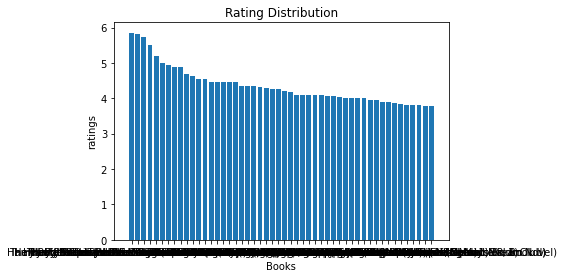

In [ ]:
import matplotlib.pyplot as plt

plt.rc("font", size = 10)

  
# Bar chart with day against tip
plt.bar(popular_df['Book-Title'],popular_df['avg_rating'])
plt.title('Rating Distribution')
plt.xlabel('Books')
plt.ylabel('ratings')
plt.plot()



In [ ]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))


In [ ]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))